# **KELOMPOK 3 TUGAS BESAR TEXT MINING**

1. OSA NASTIYAR MAULANI - 1305210055
2. NURWULAN HANDAYANI - 1305210102
3. EGI DHEA NAGITA - 1305213009

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Importing Required Libraries </div>

In [ ]:
from textblob import Word
import nltk
nltk.data.path.append("/kaggle/working/")
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:

!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.1 MB/s eta 0:00:00


In [ ]:
# Libraray for Data Manipulation
import numpy as np
import pandas as pd

# Libraray for Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

# Library for preprocessing
import contractions
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import spacy
import math
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import Parallel, delayed
import re,string,unicodedata
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from scipy.sparse import lil_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk import pos_tag

# Library for model building
from tensorflow.keras.regularizers import l2
import tensorflow
import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential
#from attention import BahdanauAttention
from keras.layers import SimpleRNN,LSTM,GRU, Embedding, Dense, SpatialDropout1D, Dropout, BatchNormalization, Bidirectional, Attention
from sklearn.metrics import accuracy_score
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.optimizers import Adam
#Library to overcome Warnings
import warnings
warnings.filterwarnings('ignore')

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Loading Dataset </div>

In [ ]:
import os

# Mengunduh dataset dari Kaggle
os.system('kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews')

# Mengekstrak file zip yang diunduh
import zipfile

with zipfile.ZipFile('imdb-dataset-of-50k-movie-reviews.zip', 'r') as zip_ref:
    zip_ref.extractall('imdb-dataset')


In [ ]:
import pandas as pd

# Membaca file CSV
df = pd.read_csv('https://raw.githubusercontent.com/jinniekyo/IMDB-reviews/main/IMDB.csv')

In [ ]:
df

review sentiment
0     One of the other reviewers has mentioned that ...  positive
1     A wonderful little production. <br /><br />The...  positive
2     I thought this was a wonderful way to spend ti...  positive
3     Basically there's a family where a little boy ...  negative
4     Petter Mattei's "Love in the Time of Money" is...  positive
...                                                 ...       ...
4996  i watched this series when it first came out i...  positive
4997  Once again Jet Li brings his charismatic prese...  positive
4998  I rented this movie, after hearing Chris Gore ...  negative
4999  This was a big disappointment for me. I think ...  negative
5000  Not a movie for everyone, but this movie is in...  positive

[5001 rows x 2 columns]

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Data Wrangling  </div>

#### 1. Computing Dimension of Dataset

In [ ]:
print('dataset shape: ',df.shape)

dataset shape:  (5001, 2)


#### 2. Statistical Summary of Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     5001 non-null   object
 1   sentiment  5001 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB


#### 3. Checking if There's Any Duplicate Records.

In [ ]:
print("Duplicates in Dataset: ",df.duplicated().sum())

Duplicates in Dataset:  3


In [ ]:
df.drop_duplicates(inplace = True)

#### 4. Computing Total No. of Missing Values and the Percentage of Missing Values

In [ ]:
missing_data = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(df))*100,2)
missing_data

Total No. of Missing Values  % of Missing Values
review                               0                  0.0
sentiment                            0                  0.0

#### 5. Performing Descriptive Analysis

In [ ]:
round(df.describe(include="O").T,2)

count unique                                                top  \
review     4998   4998  One of the other reviewers has mentioned that ...   
sentiment  4998      2                                           negative   

           freq  
review        1  
sentiment  2531

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Exploratory Data Analysis EDA  </div>

#### 1. Visualizing the Distribution of each sentiment class

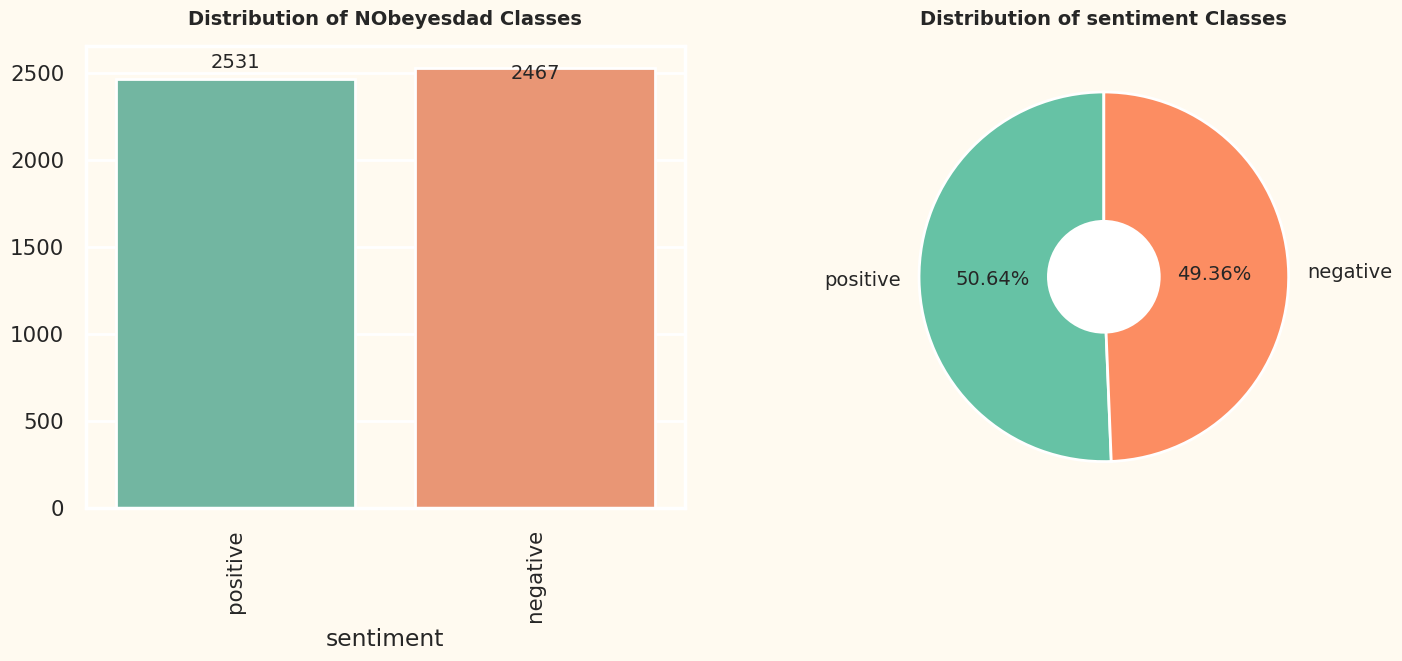

In [ ]:
classes = ['positive','negative']

plt.figure(figsize=(17, 6))
plt.subplot(1, 2, 1)
sentiment_counts = df["sentiment"].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2', order=classes)
plt.title("Distribution of NObeyesdad Classes", fontweight="black", size=14, pad=15)
for i, v in enumerate(sentiment_counts.values):
    plt.text(i, v, v, ha="center", fontsize=14)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
colors = sns.color_palette('Set2', len(classes))
plt.pie(sentiment_counts, labels=classes, autopct="%.2f%%", textprops={"size": 14},
        colors=colors, startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Distribution of sentiment Classes", fontweight="black", size=14, pad=15)
plt.show()

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Preprocessing  </div>

#### 1. Lowercasing

In [ ]:
df['review'] = df['review'].str.lower()

In [ ]:
df['review']

0       one of the other reviewers has mentioned that ...
1       a wonderful little production. <br /><br />the...
2       i thought this was a wonderful way to spend ti...
3       basically there's a family where a little boy ...
4       petter mattei's "love in the time of money" is...
                              ...                        
4996    i watched this series when it first came out i...
4997    once again jet li brings his charismatic prese...
4998    i rented this movie, after hearing chris gore ...
4999    this was a big disappointment for me. i think ...
5000    not a movie for everyone, but this movie is in...
Name: review, Length: 4998, dtype: object

#### 2. Removing Html tags

In [ ]:
import re
def remove_html_tags(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

In [ ]:
df['review'] = df['review'].apply(remove_html_tags)

#### 3. Removing URLs

In [ ]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

df['review'] = df['review'].apply(remove_url)

#### 4. Remove Punctuation

In [ ]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(text):
    return text.translate(str.maketrans('','',string.punctuation))

In [ ]:
df['review'] = df['review'].apply(remove_punctuation)

#### 5. Chat word  treatment

In [ ]:
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laughter",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "LOL": "Laughing out loud",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don’t care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "IDC": "I don’t care",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "LMAO": "Laughing my a** off",
    "BFF": "Best friends forever",
    "CSL": "Can’t stop laughing",
}


In [ ]:
def chat_conversion(text):
    new_text=[]
    for w in text.split():
        if w.upper() in chat_words:
            new_text.append(chat_words[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [ ]:
df['review'] = df['review'].apply(chat_conversion)

#### 7. Removing Stopword

In [ ]:
import nltk

# Unduh stopwords
nltk.download('stopwords')

from nltk.corpus import stopwords

# Mendapatkan daftar stopwords bahasa Inggris
stop_words = stopwords.words('english')

# Menampilkan stopwords
print(stop_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def stopwords_removal(text):
    new_text=[]
    for word in text.split():
        if word in stop_words:
            new_text.append('')
        else:
            new_text.append(word)
    x=new_text[:]
    new_text.clear()
    return " ".join(x)

In [ ]:
df['review']=df['review'].apply(stopwords_removal)
df.head()

review sentiment
0  one    reviewers  mentioned   watching  1 oz e...  positive
1   wonderful little production br br  filming te...  positive
2   thought    wonderful way  spend Tears   eyes ...  positive
3  basically theres  family   little boy jake thi...  negative
4  petter matteis love   Tears   eyes  money   vi...  positive

#### 8. Removing Emojis

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
df['review']=df['review'].apply(remove_emoji)

#### 9. Removing contractions

In [ ]:
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

df['review'] = df['review'].apply(expand_contractions)


#### Lemmatize

In [ ]:
# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Function to perform lemmatization on a single text
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    return lemmatized_text

# Function to lemmatize the 'review' column of the DataFrame
def lemmatize_reviews(df):
    df['review'] = df['review'].apply(lemmatize_text)
    return df

In [ ]:
# Lemmatize the 'review' column
df = lemmatize_reviews(df)

#### 10. Tokenize the text

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Unduh resource 'punkt'
nltk.download('punkt')

# Fungsi untuk tokenisasi teks
def do_tokenization(text):
    token_words = word_tokenize(text)
    return token_words



# Contoh tokenisasi pada kolom 'review'
df['review'] = df['review'].apply(do_tokenization)

# Menampilkan beberapa baris pertama dari DataFrame yang sudah di-tokenisasi
print(df['review'].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [one, reviewer, mention, watch, 1, oz, episode...
1    [wonderful, little, production, br, br, film, ...
2    [think, wonderful, way, spend, Tears, eye, hot...
3    [basically, there, be, family, little, boy, ja...
4    [petter, matteis, love, tear, eye, money, visu...
Name: review, dtype: object


In [ ]:
df

review sentiment
0     [one, reviewer, mention, watch, 1, oz, episode...  positive
1     [wonderful, little, production, br, br, film, ...  positive
2     [think, wonderful, way, spend, Tears, eye, hot...  positive
3     [basically, there, be, family, little, boy, ja...  negative
4     [petter, matteis, love, tear, eye, money, visu...  positive
...                                                 ...       ...
4996  [watch, series, first, came, 70si, 14, year, o...  positive
4997  [jet, li, bring, charismatic, presence, movie,...  positive
4998  [rent, movie, hear, chris, gore, say, somethin...  negative
4999  [big, disappointment, think, bad, mastroiannim...  negative
5000  [movie, everyone, movie, top, 10, lover, black...  positive

[4998 rows x 2 columns]

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Split the Data into Independent and Dependent Variable </div>

In [ ]:
x = df['review']
y = df['sentiment']

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y = encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
X_train.shape

(3998,)


## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Tokenize the data </div>

In [ ]:
tokenizer = Tokenizer()

In [ ]:
tokenizer.fit_on_texts(X_train)

In [ ]:
len(tokenizer.word_index)

38359

In [ ]:
tokenizer.document_count

3998

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
for num in X_train[0]:
    print(num, end=' ')

232 3 767 1632 318 7836 4631 39 1259 74 3364 345 355 764 315 18372 7017 59 590 10690 643 13339 243 6346 83 89 4632 7018 225 1301 79 340 3214 68 1076 3 2576 1786 310 3 2069 9 561 102 37 3912 193 2 35 18373 355 225 1925 604 428 59 18374 18375 663 5 11 337 61 1515 

In [ ]:
# Print corresponding words horizontally
for num in X_train[0]:
    word = tokenizer.index_word.get(num, 'UNK')
    print(word, end=' ')

beautiful film pure cassavete style gena rowland give stunning performance decline actress deal success age lonelinessand alcoholism try escape subconscious ghost embody death spectre young girl acceptance oneself human condition though overall difficulty real purpose film parallel theatrical sequence film puzzle like stage become way heroin american movie could topquality deal human relation adult level try infantilize standardize feeling one good drama ever 1010 

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Padding the data </div>

In [ ]:
max_length = 0
for sequence in X_train:
    # Calculate the length of the sequence
    sequence_length = len(sequence)
    # Update max_length if the current sequence length is greater
    if sequence_length > max_length:
        max_length = sequence_length

print("Maximum sequence length:", max_length)

Maximum sequence length: 963


In [ ]:
X_train=pad_sequences(X_train,maxlen=100,padding="post")
X_test=pad_sequences(X_test,maxlen=100,padding="post")

In [ ]:
X_train[0]

array([  232,     3,   767,  1632,   318,  7836,  4631,    39,  1259,
          74,  3364,   345,   355,   764,   315, 18372,  7017,    59,
         590, 10690,   643, 13339,   243,  6346,    83,    89,  4632,
        7018,   225,  1301,    79,   340,  3214,    68,  1076,     3,
        2576,  1786,   310,     3,  2069,     9,   561,   102,    37,
        3912,   193,     2,    35, 18373,   355,   225,  1925,   604,
         428,    59, 18374, 18375,   663,     5,    11,   337,    61,
        1515,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0], dtype=int32)

In [ ]:
y_train

array([1, 1, 1, ..., 0, 0, 1])


## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Modelling </div>

## Bidirectional RNN.

In [ ]:
# Define the model
RNN_model = Sequential()
RNN_model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=100))
RNN_model.add(SpatialDropout1D(0.2))
RNN_model.add(Bidirectional(SimpleRNN(64, return_sequences=True)))
RNN_model.add(Dropout(0.2))
RNN_model.add(BatchNormalization())
RNN_model.add(Bidirectional(SimpleRNN(32, return_sequences=True)))
RNN_model.add(Dropout(0.2))
RNN_model.add(BatchNormalization())
RNN_model.add(SimpleRNN(16, return_sequences=False))

# Continue with other layers
RNN_model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
RNN_model.add(Dense(1, activation='sigmoid'))

# Summarize the model
RNN_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          3836000   
                                                                 
 spatial_dropout1d (Spatial  (None, 100, 100)          0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 100, 128)          21120     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 batch_normalization (Batch  (None, 100, 128)          512       
 Normalization)                                                  
                                                        

In [ ]:
RNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = RNN_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
125/125 [==============================] - 33s 207ms/step - loss: 0.8784 - accuracy: 0.5163 - val_loss: 0.8190 - val_accuracy: 0.5050
Epoch 2/10
125/125 [==============================] - 25s 196ms/step - loss: 0.7858 - accuracy: 0.5183 - val_loss: 0.7684 - val_accuracy: 0.4920
Epoch 3/10
125/125 [==============================] - 27s 216ms/step - loss: 0.7364 - accuracy: 0.5468 - val_loss: 0.7438 - val_accuracy: 0.4930
Epoch 4/10
125/125 [==============================] - 28s 220ms/step - loss: 0.6304 - accuracy: 0.6583 - val_loss: 0.8854 - val_accuracy: 0.5200
Epoch 5/10
125/125 [==============================] - 28s 224ms/step - loss: 0.4389 - accuracy: 0.7621 - val_loss: 0.8499 - val_accuracy: 0.5470
Epoch 6/10
125/125 [==============================] - 26s 209ms/step - loss: 0.4127 - accuracy: 0.7776 - val_loss: 0.8584 - val_accuracy: 0.5110
Epoch 7/10
125/125 [==============================] - 26s 209ms/step - loss: 0.3875 - accuracy: 0.7769 - val_loss: 0.9020 - val_ac

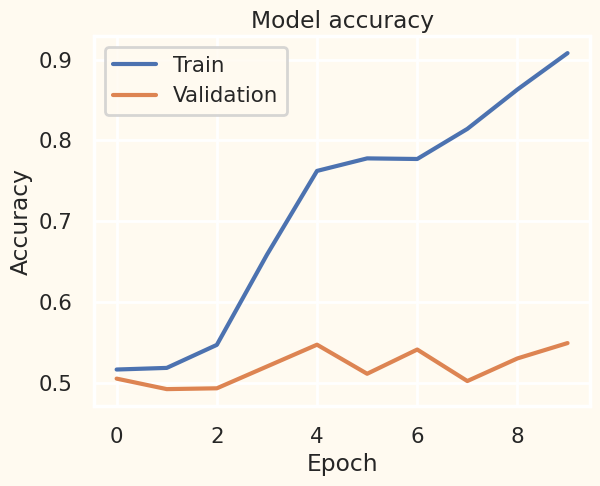

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

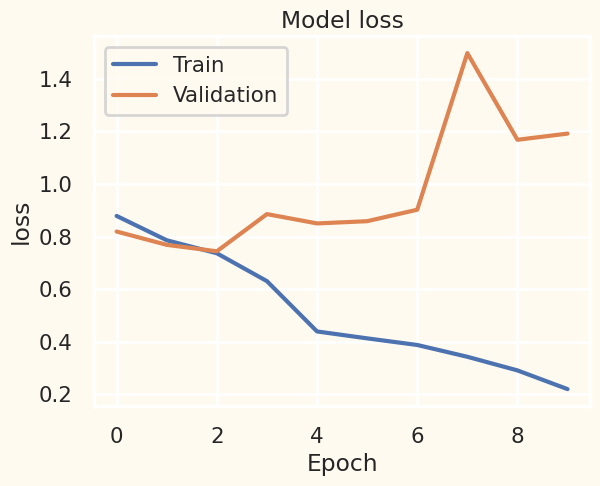

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> LSTM </div>

In [ ]:
# Define the model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=100))
lstm_model.add(SpatialDropout1D(0.5))
lstm_model.add(LSTM(5, return_sequences=False))
lstm_model.add(Dropout(0.5))
lstm_model.add(BatchNormalization())


lstm_model.add(Dense(1, activation='sigmoid'))

# Summarize the model
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          3836000   
                                                                 
 spatial_dropout1d_1 (Spati  (None, 100, 100)          0         
 alDropout1D)                                                    
                                                                 
 lstm (LSTM)                 (None, 5)                 2120      
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 batch_normalization_2 (Bat  (None, 5)                 20        
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 1)                

In [ ]:
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))


Epoch 1/10
32/32 [==============================] - 9s 203ms/step - loss: 0.8369 - accuracy: 0.5125 - val_loss: 0.6919 - val_accuracy: 0.5210
Epoch 2/10
32/32 [==============================] - 3s 106ms/step - loss: 0.7322 - accuracy: 0.5650 - val_loss: 0.6907 - val_accuracy: 0.5370
Epoch 3/10
32/32 [==============================] - 3s 105ms/step - loss: 0.6748 - accuracy: 0.6063 - val_loss: 0.6886 - val_accuracy: 0.5820
Epoch 4/10
32/32 [==============================] - 4s 117ms/step - loss: 0.6121 - accuracy: 0.6308 - val_loss: 0.6859 - val_accuracy: 0.5660
Epoch 5/10
32/32 [==============================] - 5s 146ms/step - loss: 0.5509 - accuracy: 0.6778 - val_loss: 0.6800 - val_accuracy: 0.6020
Epoch 6/10
32/32 [==============================] - 3s 105ms/step - loss: 0.4938 - accuracy: 0.7259 - val_loss: 0.6619 - val_accuracy: 0.6780
Epoch 7/10
32/32 [==============================] - 3s 105ms/step - loss: 0.4021 - accuracy: 0.8169 - val_loss: 0.5153 - val_accuracy: 0.8000
Epoch 

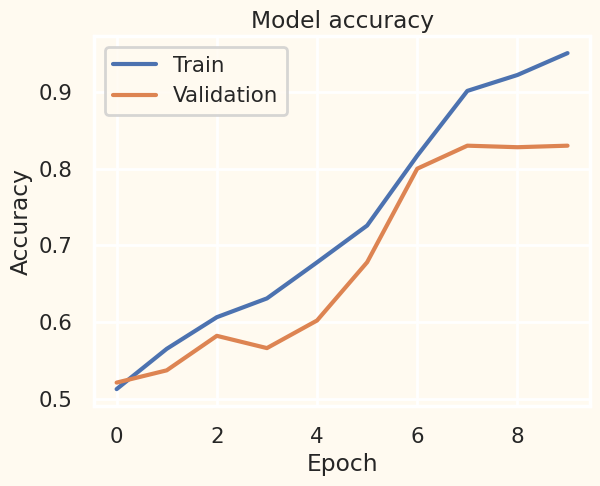

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

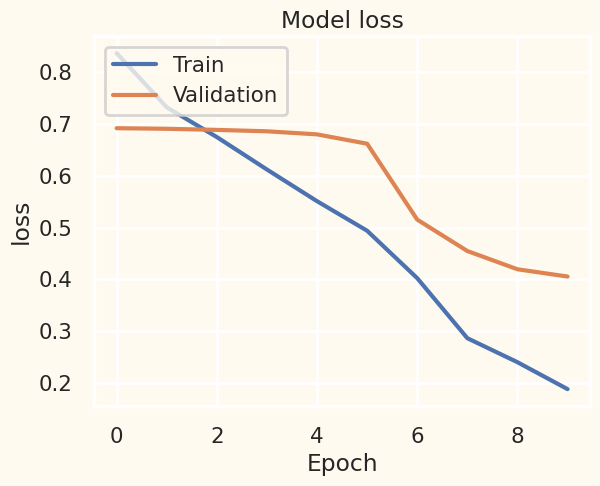

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Model Evaluation and Comparision  </div>

## Bideirectional RNN (Recurrent Neural Network)

In [ ]:
RNN_pred = RNN_model.predict(X_test)

32/32 [==============================] - 2s 31ms/step


In [ ]:
RNN_pred = (RNN_pred > 0.5).astype('int')

In [ ]:
Bidirection_RNN_Accuracy = accuracy_score(RNN_pred,y_test)*100
print("Bidirection_RNN_Accuracy Score is :",Bidirection_RNN_Accuracy,'%')

Bidirection_RNN_Accuracy Score is : 54.900000000000006 %


In [ ]:
from sklearn.metrics import classification_report
report_dict = classification_report(y_test, RNN_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df

precision    recall  f1-score   support
0              0.556876  0.633205  0.592593   518.000
1              0.537713  0.458506  0.494961   482.000
accuracy       0.549000  0.549000  0.549000     0.549
macro avg      0.547294  0.545855  0.543777  1000.000
weighted avg   0.547639  0.549000  0.545534  1000.000

In [ ]:
sentiment_labels = {0: 'negative', 1: 'positive'}

RNN_sentiments = [[sentiment_labels[val[0]]] for val in RNN_pred]
RNN_sentiments[0:10]

[['positive'],
 ['positive'],
 ['negative'],
 ['negative'],
 ['negative'],
 ['positive'],
 ['positive'],
 ['positive'],
 ['negative'],
 ['negative']]

## LSTM (Long short Term Memory)

In [ ]:
lstm_pred = lstm_model.predict(X_test)

32/32 [==============================] - 1s 9ms/step


In [ ]:
lstm_pred = (lstm_pred > 0.5).astype('int')

In [ ]:
LSTM_Accuracy = accuracy_score(lstm_pred,y_test)*100
print("LSTM_Accuracy Score is :",LSTM_Accuracy,'%')

LSTM_Accuracy Score is : 83.0 %


In [ ]:
from sklearn.metrics import classification_report
report_dict = classification_report(y_test, lstm_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df

precision    recall  f1-score  support
0              0.817518  0.864865  0.840525   518.00
1              0.845133  0.792531  0.817987   482.00
accuracy       0.830000  0.830000  0.830000     0.83
macro avg      0.831325  0.828698  0.829256  1000.00
weighted avg   0.830828  0.830000  0.829662  1000.00

In [ ]:
sentiment_labels = {0: 'negative', 1: 'positive'}

lstm_sentiments = [[sentiment_labels[val[0]]] for val in lstm_pred]
lstm_sentiments[0:10]

[['positive'],
 ['positive'],
 ['negative'],
 ['negative'],
 ['positive'],
 ['negative'],
 ['negative'],
 ['negative'],
 ['negative'],
 ['positive']]

In [ ]:
comp_df = pd.DataFrame(columns = ['Bidirectional_RNN','LSTM_Sentiment'])
comp_df['Bidirectional_RNN'] = RNN_sentiments
comp_df['LSTM_Sentiment'] = lstm_sentiments

In [ ]:
comp_df.head(10)

Bidirectional_RNN LSTM_Sentiment
0        [positive]     [positive]
1        [positive]     [positive]
2        [negative]     [negative]
3        [negative]     [negative]
4        [negative]     [positive]
5        [positive]     [negative]
6        [positive]     [negative]
7        [positive]     [negative]
8        [negative]     [negative]
9        [negative]     [positive]

In [ ]:
# Create a DataFrame with these accuracy scores
data = {
    'Model': ['Bidirectional RNN', 'LSTM'],
    'Accuracy': [Bidirection_RNN_Accuracy, LSTM_Accuracy]
}
Acc_df = pd.DataFrame(data)


In [ ]:
Acc_df

Model  Accuracy
0  Bidirectional RNN      54.9
1               LSTM      83.0

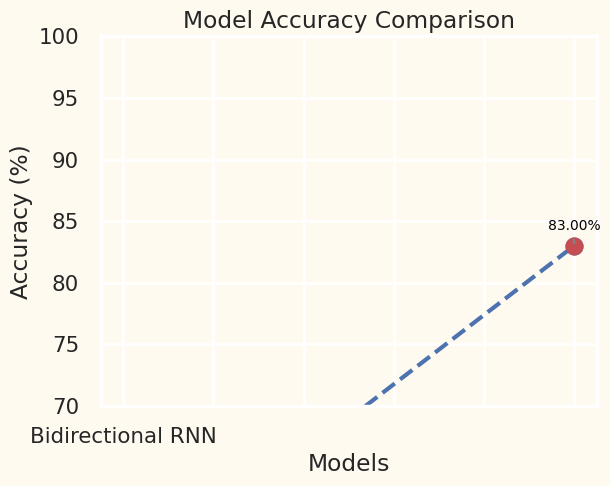

In [ ]:
# Plot the DataFrame
ax = Acc_df.plot(x='Model', y='Accuracy', marker='o', linestyle='dashed', color='b', legend=False)

# Add labels, title, and customize the plot
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Accuracy Comparison')
ax.set_ylim(70, 100)  # Set the y-axis limits for percentage values

# Highlight the points and add value labels
for i, accuracy in enumerate(Acc_df['Accuracy']):
    ax.annotate(f'{accuracy:.2f}%', xy=(i, accuracy), xytext=(i, accuracy + 1),
                ha='center', va='bottom', fontsize=10, color='black',
                arrowprops=dict(arrowstyle='-', color='gray'))
    ax.plot(i, accuracy, 'ro')  # Highlight points with red color

# Show the plot
plt.show()
